In [7]:
import matplotlib
import matplotlib.pyplot as plt

import jax
import jax.numpy as np
from jax.random import PRNGKey

import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive

import pandas as pd

from models import SEIR_stochastic, plot_samples, plot_forecast, plot_R0
import util

# Run Inference

In [62]:
world_data = util.load_world_data()
state_data = util.load_state_data()
data = dict(world_data, **state_data)  # all data

prob_model = SEIR_stochastic

save = True

#places = state_data.keys()
#places = ['Italy', 'US', 'WA', 'NY', 'MA']
places = ['NY', 'MA', 'WA', 'AK', 'WV']
#places = ['US']
#places = ['LA']
#places = ['NY', 'WA']

for place in places:

    print(f"******* {place} *********")
    
    start = pd.Timestamp('2020-03-04')
    confirmed = data[place]['data'].confirmed[start:]
    hosp = data[place]['data'].hospitalizedCumulative[start:]
    start = confirmed.index.min()

    T = len(confirmed)
    N = data[place]['pop']

    args = {
        'N': N,
        'T': T,
        'rw_scale': 2e-1,
        'use_hosp' : True
    }

    kernel = NUTS(prob_model,
                  init_strategy = numpyro.infer.util.init_to_median())

    mcmc = MCMC(kernel, 
                num_warmup=1000, 
                num_samples=1000, 
                num_chains=1)

    print("Running MCMC")
    mcmc.run(jax.random.PRNGKey(2),
             obs = confirmed.values,
             hosp = hosp.values,
             **args)

    mcmc.print_summary()
    mcmc_samples = mcmc.get_samples()
    
    # Prior samples for comparison
    prior = Predictive(prob_model, posterior_samples = {}, num_samples = 1000)
    prior_samples = prior(PRNGKey(2), **args)

    # Posterior predictive samples for visualization
    args['rw_scale'] = 0 # disable random walk for forecasting
    post_pred = Predictive(prob_model, posterior_samples = mcmc_samples)
    post_pred_samples = post_pred(PRNGKey(2), T_future=100, **args)

    if save:
        util.save_samples(place,
                         prior_samples,
                         mcmc_samples, 
                         post_pred_samples)
        
        util.write_summary(place, mcmc)

******* NY *********
Running MCMC


sample: 100%|██████████| 2000/2000 [03:02<00:00, 10.93it/s, 1023 steps of size 5.91e-03. acc. prob=0.96]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
         E0    328.91    178.26    290.83     99.53    545.08    513.68      1.00
         I0     20.69      6.37     19.33     12.02     30.90    631.54      1.00
    beta[0]      1.64      0.66      1.50      0.71      2.65    323.97      1.02
    beta[1]      1.65      0.64      1.52      0.74      2.57    564.26      1.01
    beta[2]      1.62      0.60      1.52      0.76      2.50    726.12      1.00
    beta[3]      1.60      0.63      1.49      0.72      2.47    757.68      1.00
    beta[4]      1.63      0.66      1.51      0.65      2.53    748.81      1.00
    beta[5]      1.70      0.70      1.58      0.70      2.66    557.93      1.00
    beta[6]      1.87      0.80      1.72      0.75      2.90    530.68      1.00
    beta[7]      2.13      0.91      1.97      0.85      3.37    512.73      1.00
    beta[8]      2.43      1.07      2.24      0.87      3.82    489.11      1.00
    beta[9]    

sample: 100%|██████████| 2000/2000 [06:17<00:00,  5.30it/s, 1023 steps of size 6.93e-03. acc. prob=0.95]  



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
         E0     12.65     13.06      9.42      0.01     27.19    495.26      1.00
         I0      6.75      2.24      6.35      3.69     10.06    449.60      1.00
    beta[0]      2.90      0.96      2.81      1.40      4.25    160.73      1.00
    beta[1]      2.98      0.93      2.90      1.49      4.34    412.56      1.00
    beta[2]      2.83      0.83      2.73      1.58      4.12    587.85      1.00
    beta[3]      2.44      0.74      2.32      1.34      3.51    543.45      1.01
    beta[4]      1.85      0.58      1.75      1.00      2.72    386.10      1.01
    beta[5]      1.29      0.40      1.23      0.65      1.87    330.06      1.01
    beta[6]      0.97      0.33      0.91      0.47      1.46    318.32      1.01
    beta[7]      0.83      0.28      0.78      0.37      1.22    374.24      1.01
    beta[8]      0.80      0.28      0.75      0.36      1.19    399.24      1.01
    beta[9]    

sample: 100%|██████████| 2000/2000 [02:12<00:00, 15.14it/s, 1023 steps of size 1.14e-02. acc. prob=0.93]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
         E0    241.64    225.65    183.50      1.05    514.03    525.83      1.00
         I0    149.76     43.60    142.88     90.39    217.10    497.65      1.00
    beta[0]      1.21      0.62      1.06      0.36      2.02    478.03      1.00
    beta[1]      1.22      0.61      1.07      0.45      2.19    587.82      1.00
    beta[2]      1.29      0.65      1.12      0.34      2.17    654.78      1.00
    beta[3]      1.38      0.71      1.19      0.48      2.44    678.85      1.00
    beta[4]      1.46      0.72      1.27      0.51      2.46    697.63      1.00
    beta[5]      1.51      0.74      1.33      0.47      2.48    690.60      1.00
    beta[6]      1.49      0.73      1.31      0.55      2.42    651.94      1.00
    beta[7]      1.42      0.69      1.26      0.54      2.42    698.42      1.00
    beta[8]      1.33      0.66      1.17      0.45      2.26    739.77      1.00
    beta[9]    

sample: 100%|██████████| 2000/2000 [07:28<00:00,  4.46it/s, 1023 steps of size 6.57e-03. acc. prob=0.95]  



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
         E0      0.17      0.19      0.12      0.00      0.37    403.49      1.00
         I0      0.04      0.04      0.03      0.00      0.10    438.76      1.00
    beta[0]      2.22      1.14      1.98      0.61      3.78    222.77      1.01
    beta[1]      2.32      1.21      2.05      0.67      4.03    277.66      1.01
    beta[2]      2.46      1.28      2.16      0.66      4.16    369.86      1.00
    beta[3]      2.65      1.36      2.34      0.77      4.53    429.87      1.00
    beta[4]      2.83      1.44      2.50      1.00      4.76    657.78      1.00
    beta[5]      3.02      1.46      2.71      1.01      4.99    605.13      1.00
    beta[6]      3.16      1.54      2.81      1.11      5.23    628.17      1.00
    beta[7]      3.21      1.53      2.87      1.09      5.24    523.48      1.00
    beta[8]      3.16      1.48      2.85      1.16      5.00    465.20      1.00
    beta[9]    

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x61cd11ef0>
Traceback (most recent call last):
  File "/Users/sheldon/opt/anaconda3/lib/python3.7/weakref.py", line 364, in remove
    del self.data[k]
KeyboardInterrupt
warmup:   6%|▋         | 125/2000 [00:49<12:27,  2.51it/s, 1023 steps of size 1.87e-04. acc. prob=0.75] 


KeyboardInterrupt: 

NY


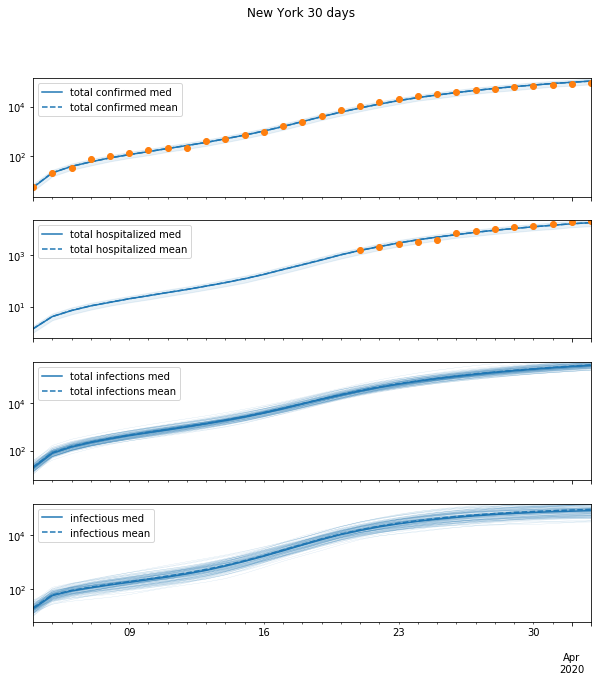

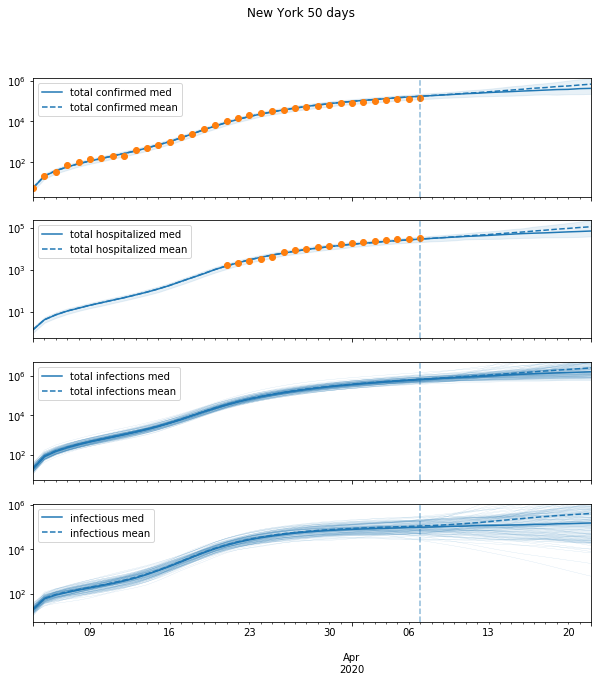

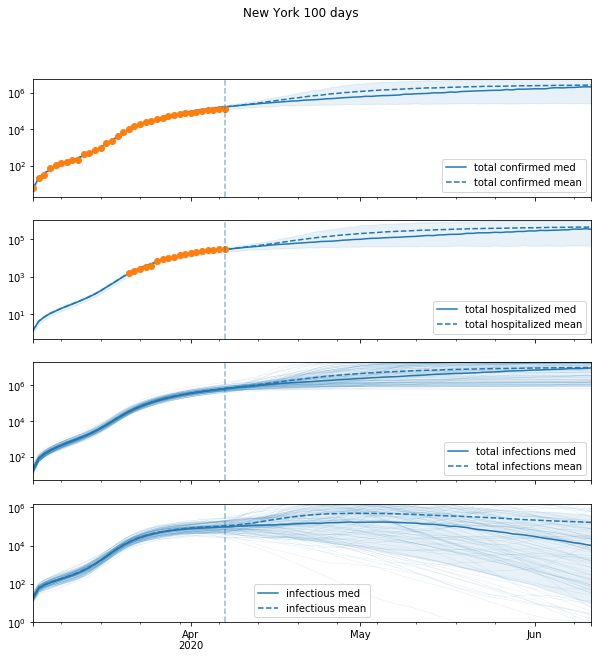

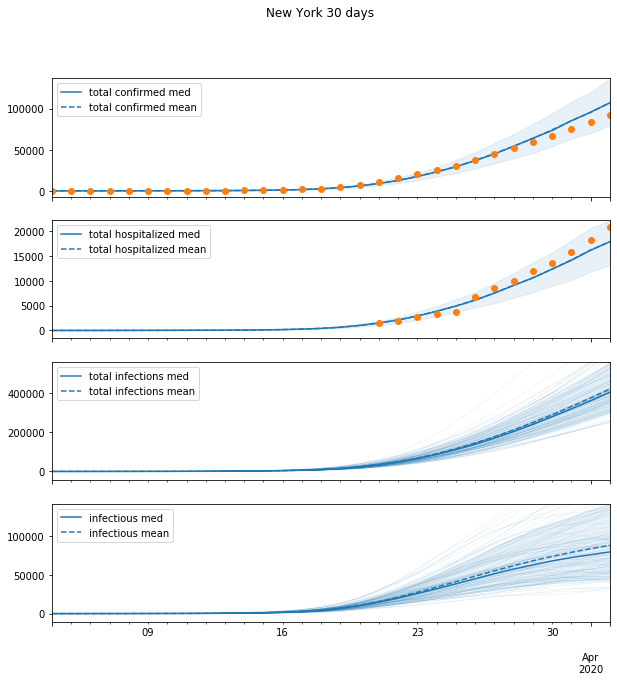

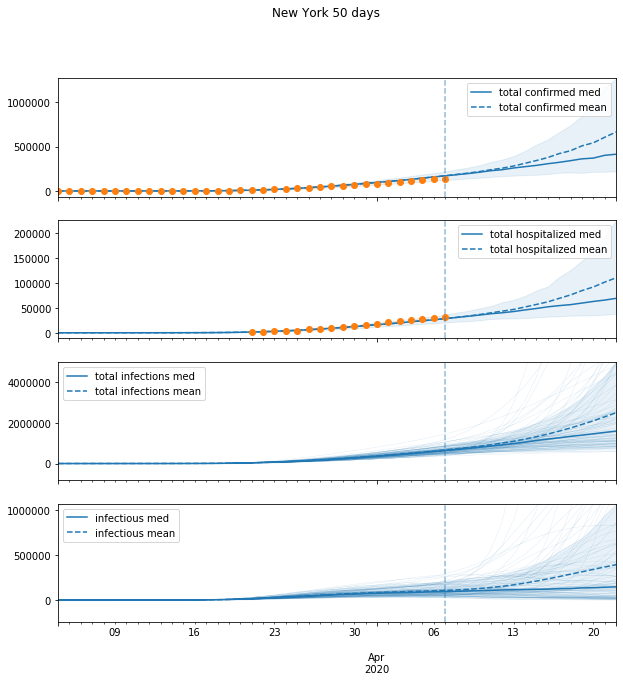

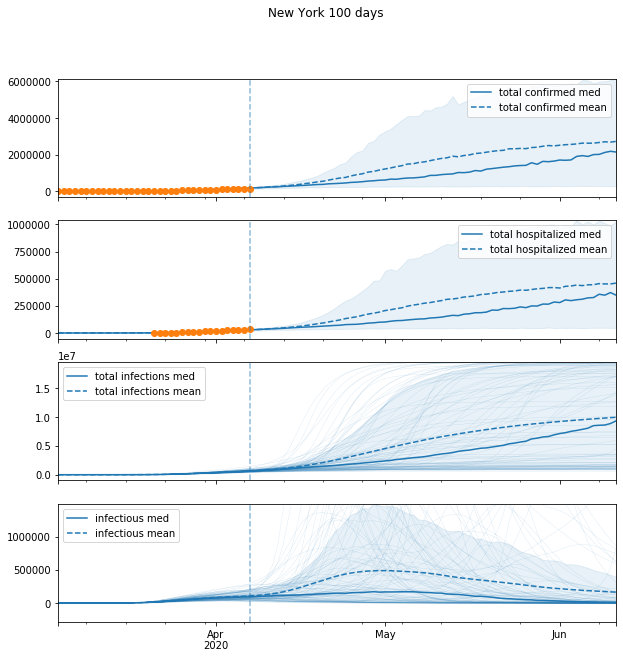

<Figure size 360x216 with 0 Axes>

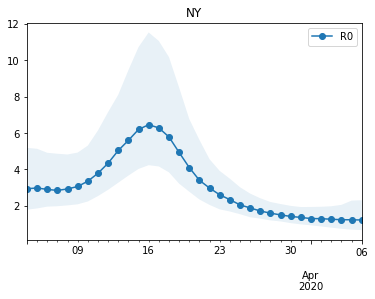

MA


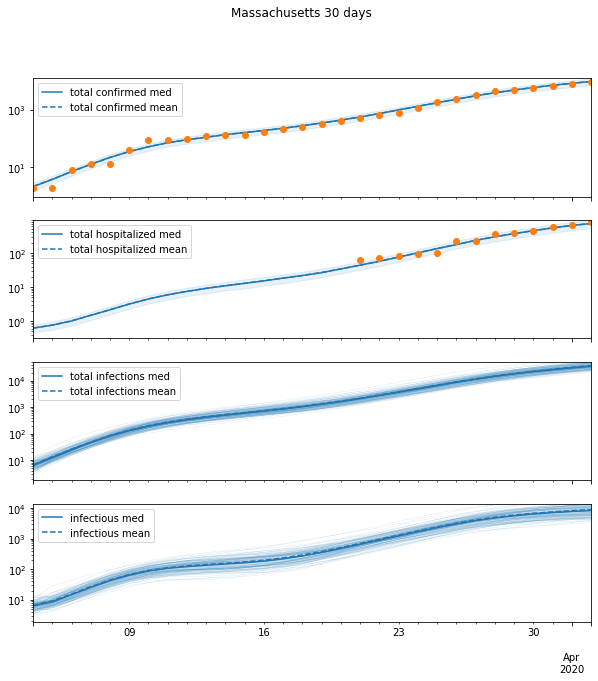

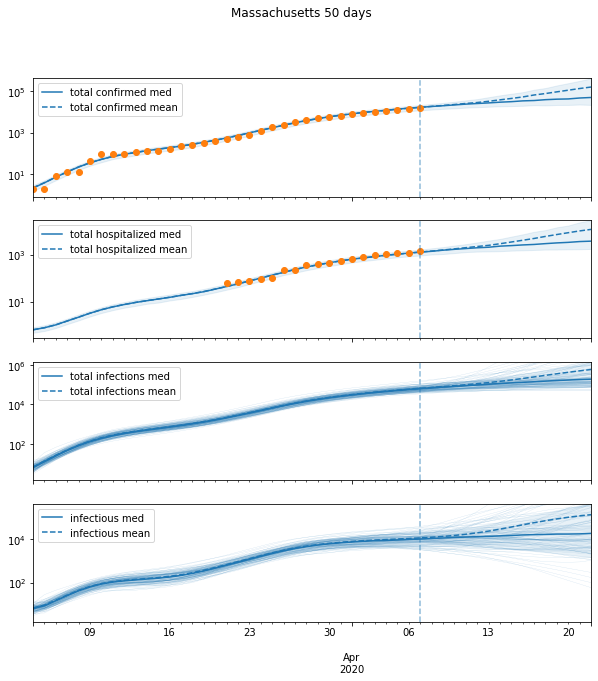

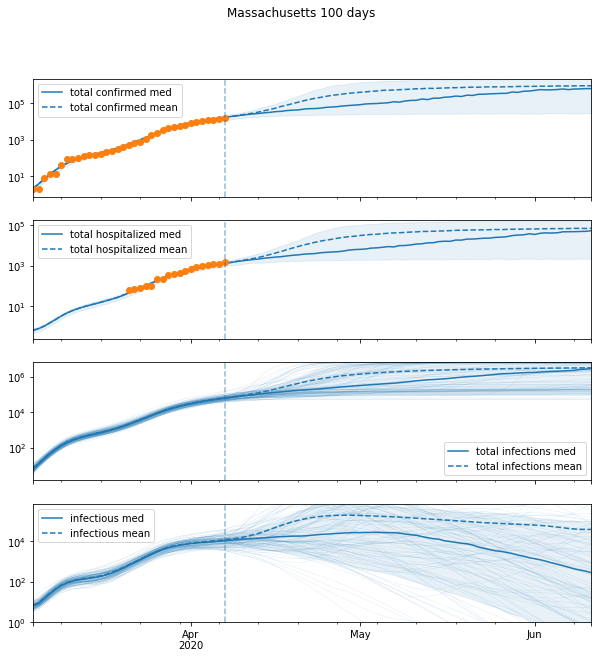

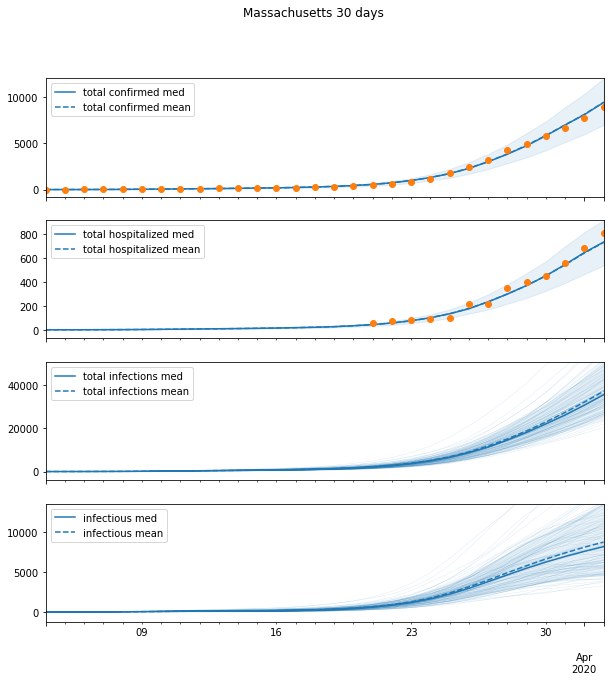

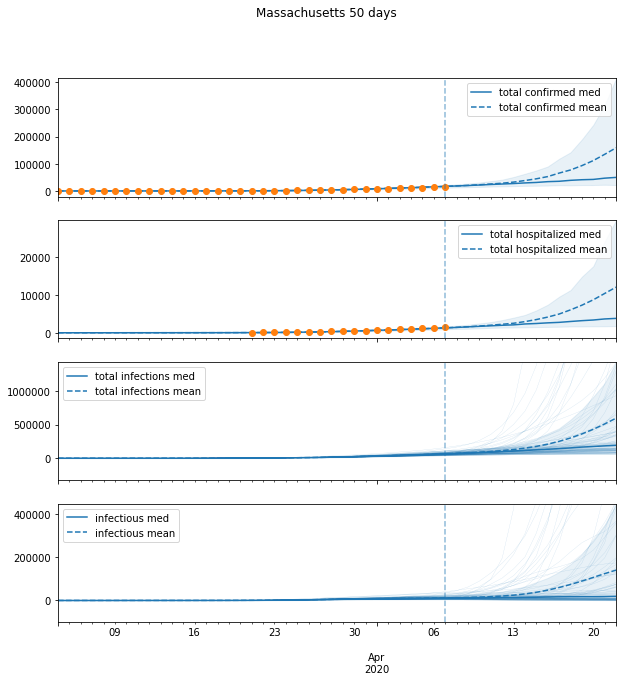

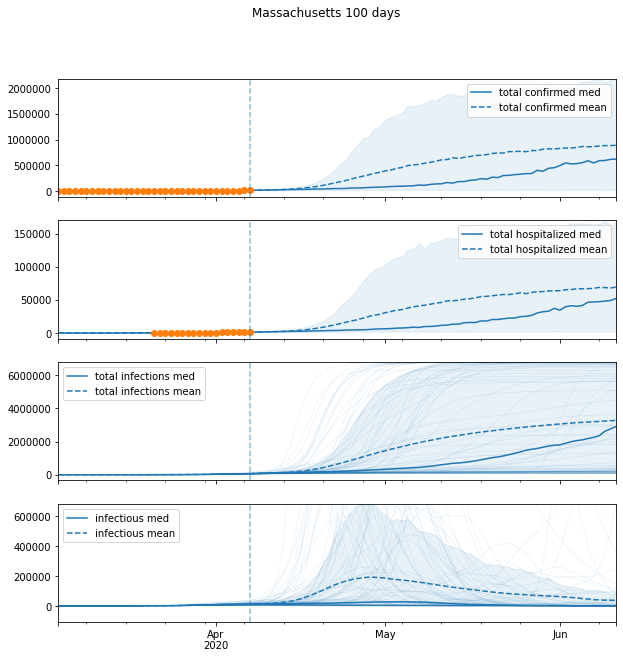

<Figure size 360x216 with 0 Axes>

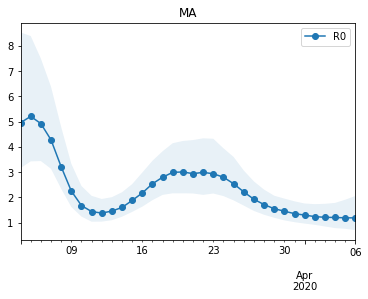

WA


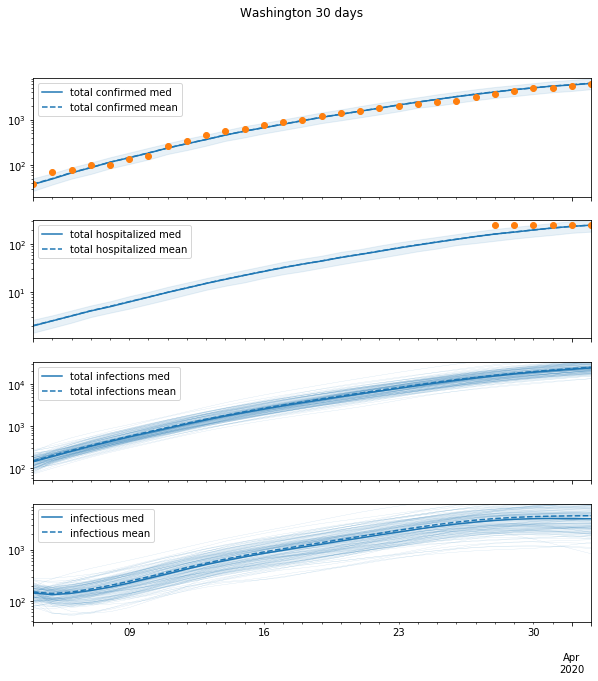

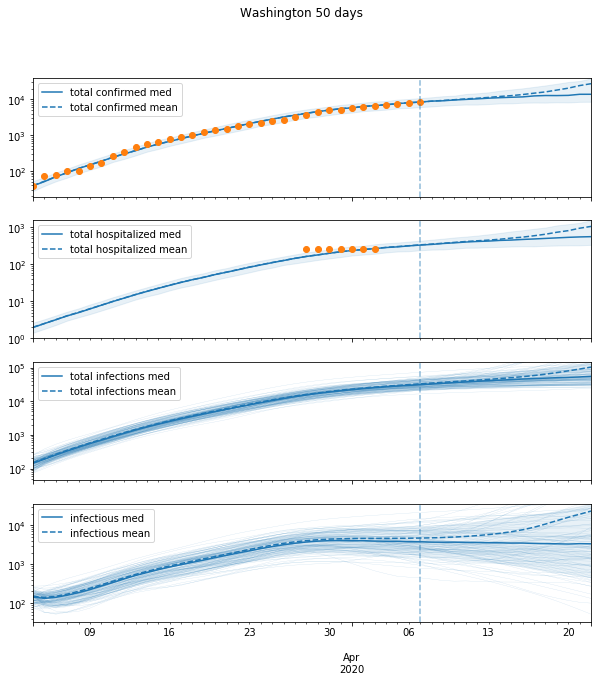

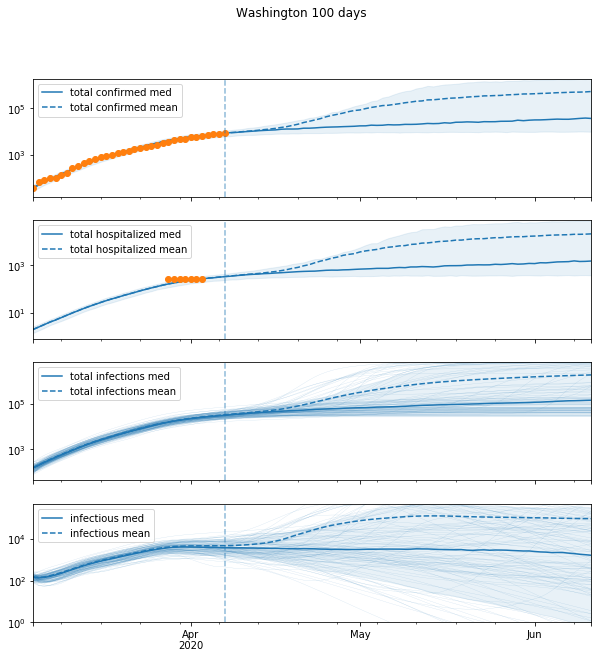

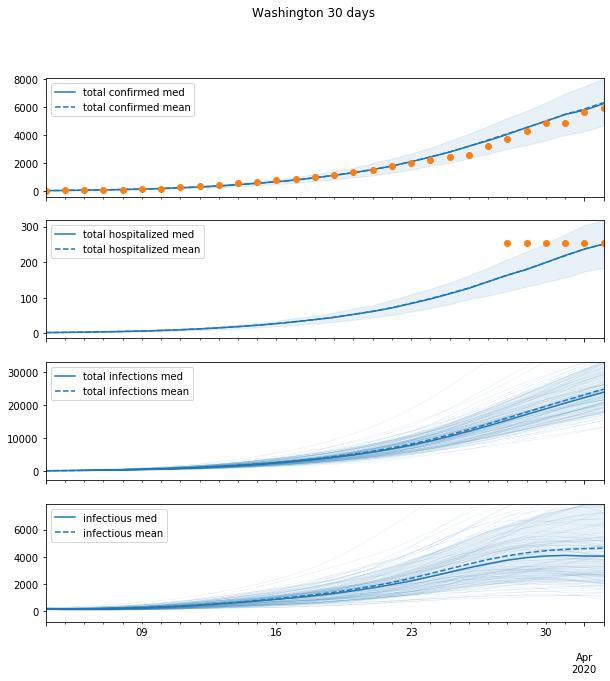

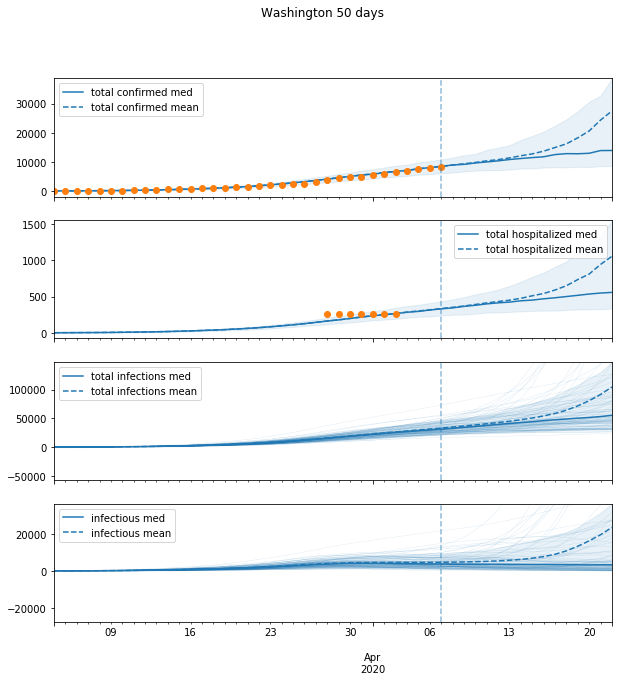

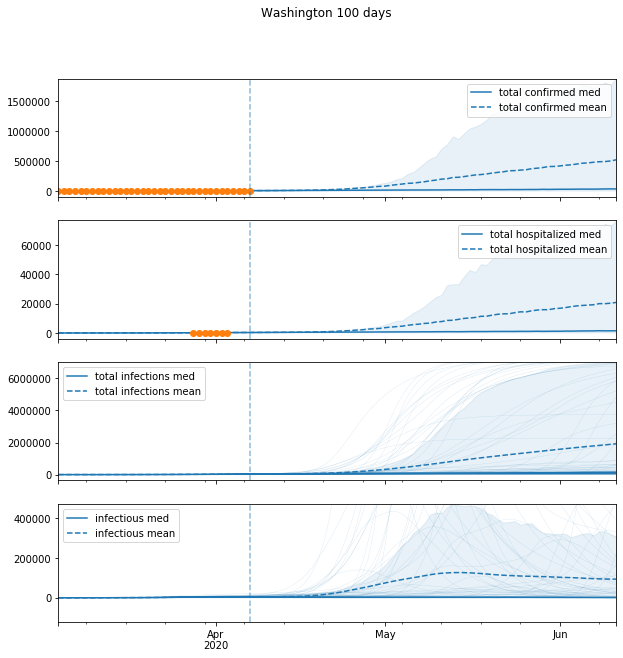

<Figure size 360x216 with 0 Axes>

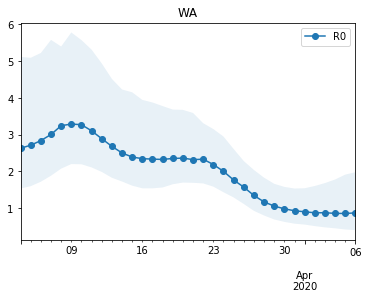

AK


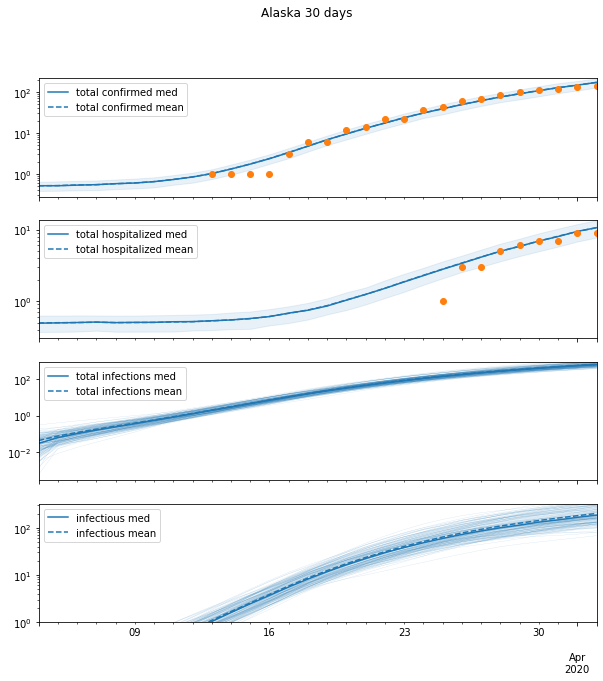

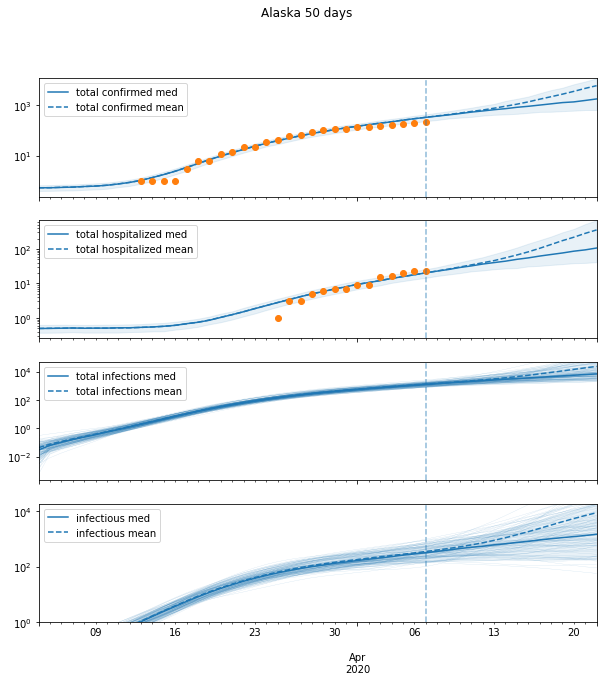

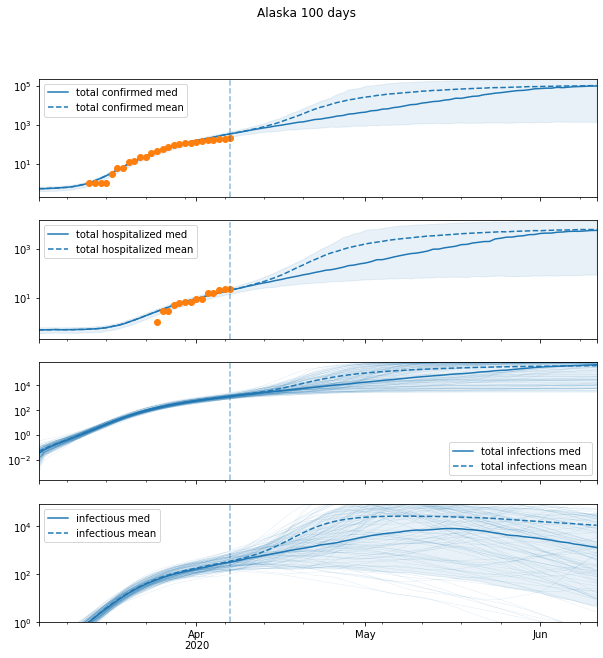

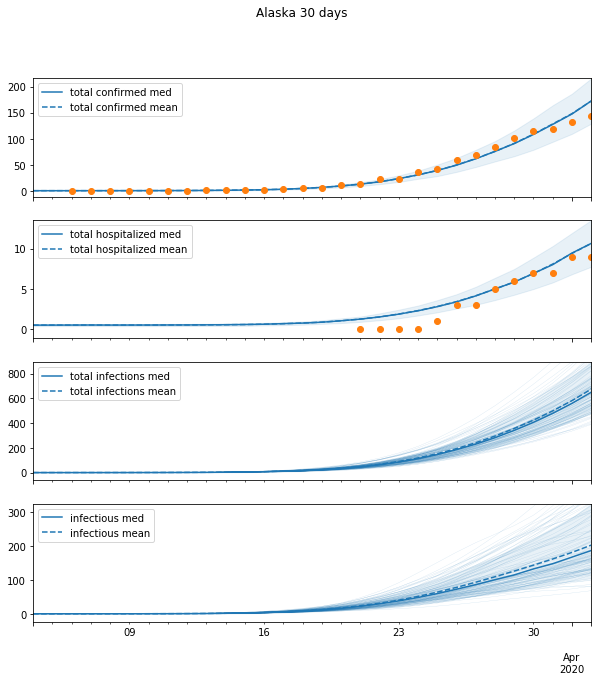

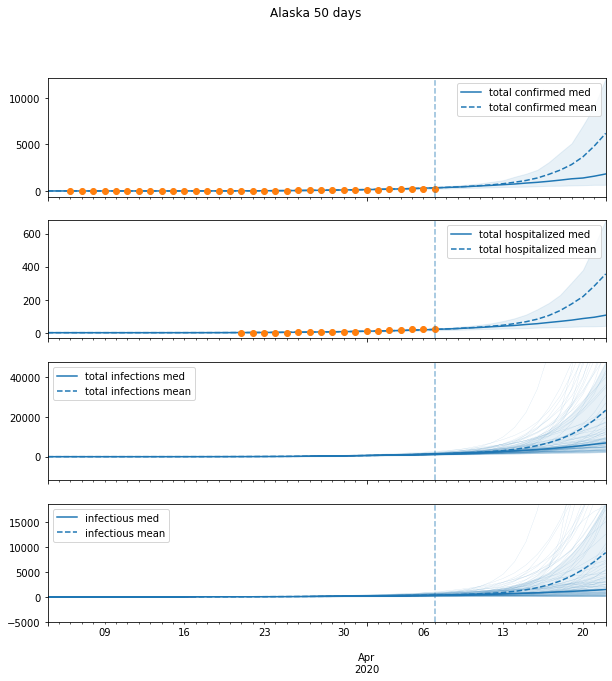

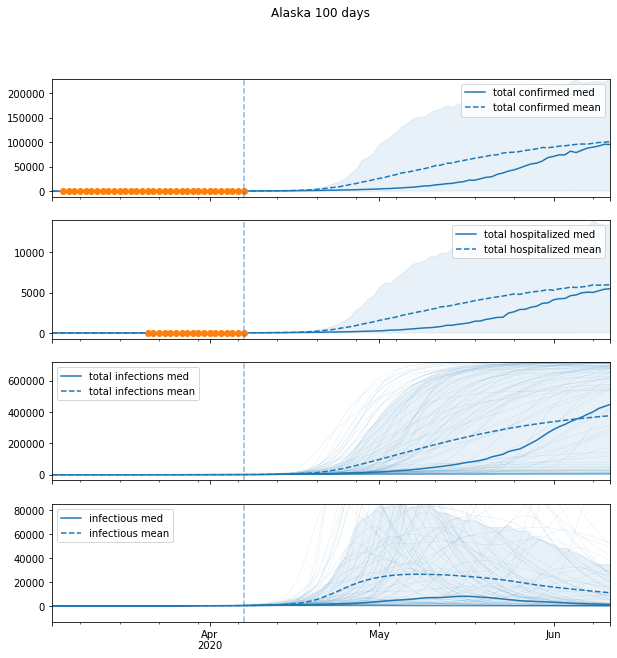

<Figure size 360x216 with 0 Axes>

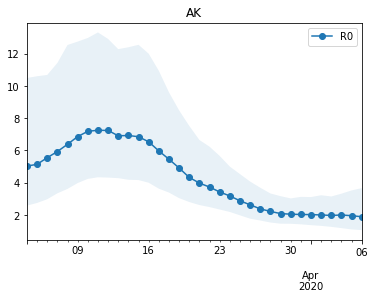

WV


KeyError: 'z'

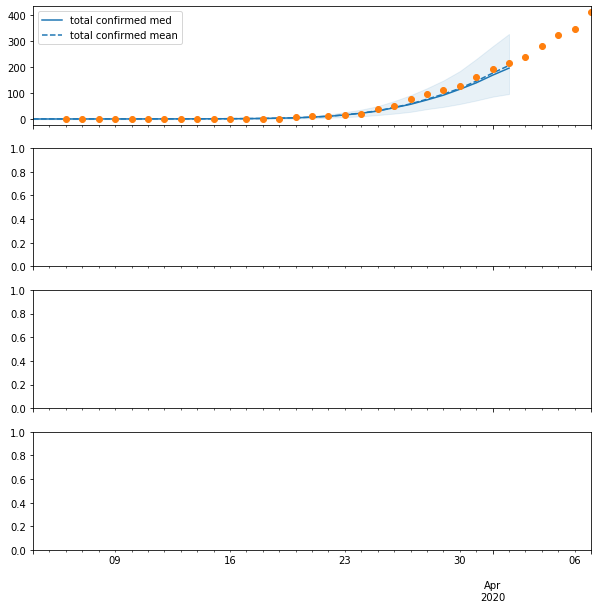

In [63]:
save = False

world_data = util.load_world_data()
state_data = util.load_state_data()
data = dict(world_data, **state_data)  # all data

start = '2020-03-04'
#places = ['Italy', 'US', 'WA', 'NY', 'MA']
#places = ['ID']
places = ['NY']
#places = state_data.keys()
#places = ['AK']
#places = ['US']
#places = ['LA', 'NY']
places = ['NY', 'MA', 'WA', 'AK', 'WV']


use_hosp = True


# Inspect and Save Results 
for place in places:
    print(place)
    confirmed = data[place]['data'].confirmed[start:]
    hosp = data[place]['data'].hospitalizedCumulative[start:]
    start_ = confirmed.index.min()

    T = len(confirmed)
    N = data[place]['pop']

    prior_samples, mcmc_samples, post_pred_samples = util.load_samples(place)
    
    for scale in ['log', 'lin']:
        for T in [30, 50, 100]:

            t = pd.date_range(start=start_, periods=T, freq='D')

            fig, ax = plot_forecast(post_pred_samples, T, confirmed, 
                                    t = t, 
                                    scale = scale, 
                                    use_hosp = use_hosp, 
                                    hosp = hosp)
            
            name = data[place]['name']
            plt.suptitle(f'{name} {T} days ')

            if save:
                filename = f'vis/{place}_predictive_scale_{scale}_T_{T}.png'
                plt.savefig(filename)
                
            plt.show()
            
    fig = plot_R0(mcmc_samples, start_)    
    if save:
        filename = f'vis/{place}_R0.png'
        plt.savefig(filename)

    plt.title(place)
    plt.show()

In [ ]:
import seaborn as sns

cols = ['gamma', 'beta0', 'sigma', 'det_rate']

def get_cols(d):
    return {k: v for k, v in d.items() if k in cols}

prior_df = pd.DataFrame(get_cols(prior_samples))
posterior_df = pd.DataFrame(get_cols(mcmc_samples))

prior_df['dist'] = 'prior'
posterior_df['dist'] = 'posterior'

# Visualize priors
fig, ax = plt.subplots(ncols=len(cols), figsize=(16,3))
for i in range(len(cols)):
    sns.kdeplot(prior_df[cols[i]], ax=ax[i], shade=True)
    ax[i].set_title(cols[i])
    plt.suptitle('Priors')
plt.show()
    

# Compare posterior to prior
df = pd.concat([prior_df, posterior_df])
g = sns.PairGrid(df, hue='dist', diag_sharey=False, vars=['beta0', 'gamma', 'sigma'])
g = g.map_diag(sns.kdeplot, shade=True)
g = g.map_upper(plt.scatter, s=0.1, alpha=0.5)
g = g.map_lower(sns.kdeplot, n_levels=5, shade=True, shade_lowest=False, alpha=0.6)
g = g.add_legend()
plt.show()

# Compare gamma and beta0 specifically
fig, ax = plt.subplots(figsize=(9,4), ncols=2)

xlim = [0, 6]
ylim = [0, 3]

for df, name, a in zip([prior_df, posterior_df], ['Prior', 'Posterior'], ax):
    sns.kdeplot(df['beta0'], 
                df['gamma'], 
                ax=a,
                shade=True, 
                shade_lowest=False)
    a.set_title(name)
    a.set_xlim(xlim)
    a.set_ylim(ylim)

plt.show()

In [ ]:
samples = post_pred_samples
X = np.concatenate((samples['x'], samples['x_future']), axis=1)

T = X.shape[1]
t = pd.date_range(start, freq='D', periods=T)
levels = 10

beta0 = mcmc_samples['beta0']
gamma = mcmc_samples['gamma']
inds = np.argsort(beta0)
level_inds = inds[np.linspace(0, len(I)-1, levels).astype('int32')]

fig, ax = plt.subplots(figsize=(12,14), nrows=5)


beta0_gamma = [f'({beta0[i]:.2f}, {gamma[i]:.2f})' for i in level_inds]

for col, name, a in zip([0, 1, 2, 3, 4], 
                       ['susceptible', 'exposed', 'infectious', 'removed', 'cum. infected'],
                       ax):

    X_levels = np.squeeze(X[level_inds,:,col].T)

    lines = []
    cmap = plt.cm.cool
    for i in range(levels):
        lines += a.plot(t, X_levels[:,i], color=cmap(i*30))

    a.set_title(name)
    
plt.legend(beta0_gamma)

plt.show()

In [ ]:
n = 50
for i in range(n):
    print(plt.cm.jet(i * n / 256))

In [ ]:
sns.distplot(df['beta0'], hist=False, kde_kws={'shade': True})

In [ ]:
from compartment import SIRModel, SEIRModel

save = False

beta = mcmc_samples['beta0']
#gamma = np.broadcast_to(mcmc_samples['gamma'][:,None], beta.shape)
gamma = mcmc_samples['gamma']
plt.plot(beta, gamma, '.')
offset = (beta-gamma).mean()

plt.plot([0.+offset, gamma.max()+offset], [0., gamma.max()])
plt.xlabel('beta')
plt.ylabel('gamma')
plt.title('posterior over (beta, gamma)')
plt.legend(['samples', r'gamma = beta + ' + f'{offset:.2f}'])
if save:
    filename = f'figs/{place}_beta_gamma.pdf'
    plt.savefig(filename)
plt.show()


plt.hist(beta/gamma, bins=100)
plt.title('R_0')
plt.xlabel('beta/gamma')
R_0_mean = np.mean(beta/gamma)
print("R0:", R_0_mean)
if save:
    filename = f'figs/{place}_R0.pdf'
    plt.savefig(filename)
plt.show()


growth_rate = SEIRModel.growth_rate((mcmc_samples['beta0'], 
                                     mcmc_samples['sigma'],
                                     mcmc_samples['gamma']))
plt.hist(growth_rate, bins=100)
plt.title('growth rate')
if save:
    filename = f'figs/{place}_growth_rate.pdf'
    plt.savefig(filename)
plt.show()

plt.hist(mcmc_samples['det_rate'], bins=50)
plt.title('det. rate')
if save:
    filename = f'figs/{place}_growth_rate.pdf'
    plt.savefig(filename)
plt.show()


## Tests

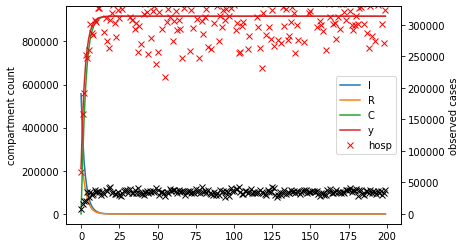

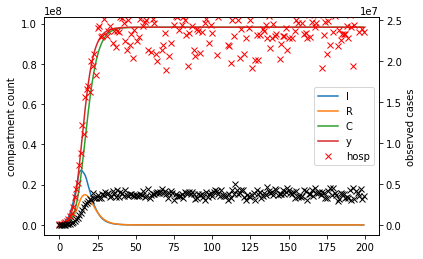

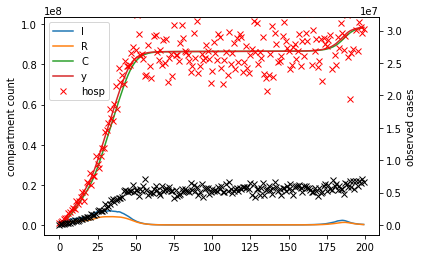

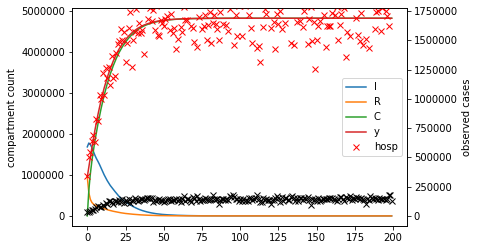

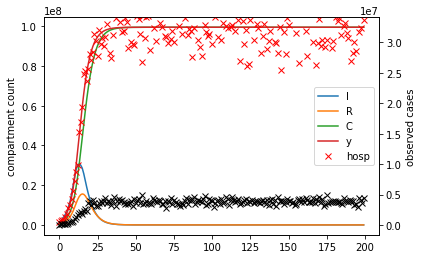

In [56]:
def test_prior(i, log_scale=False, **kwargs):
    with numpyro.handlers.seed(rng_seed=i):
        beta, x, y, z, obs_rate, hosp_rate = SEIR_stochastic(**kwargs)
        
    T = len(x)
    ts = np.arange(T)
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    
    l1 = ax1.plot(ts, x[:,1:])    
    l2 = ax2.plot(ts, y, 'x', color='r')
    l3 = ax2.plot(ts, z, 'x', color='k')
        
    plt.legend(l1 + l2 + l3, ['I', 'R', 'C', 'y', 'hosp'])
    
    ax1.set_ylabel('compartment count')
    ax2.set_ylabel('observed cases')

    if log_scale:
        ax1.set_yscale('log')
        ax2.set_yscale('log')
    
    ylim = np.array(ax1.get_ylim())
    ax2.set_ylim(obs_rate * ylim )
    
    plt.show()

def test_prior_predictive():
    T = 100
    T_future = 100
    N = 1e6
    predictive = Predictive(SEIR_stochastic, 
                            posterior_samples = {}, 
                            num_samples=100)

    samples = predictive(PRNGKey(2), T=T, T_future=100, N=N, det_conc=200)

    plot_samples(samples, T=200, plot_fields=['I', 'y'])
    plt.title('Prior predictive')
    plt.yscale('log') 
    plt.show()
    
    return samples
    
run_tests = True
    
if run_tests:
    for i in range(5):
        test_prior(i, log_scale=False, T=100, T_future=100, N=1e8, use_hosp=True)
        
#    samples = test_prior_predictive()

In [ ]:
# Observation distribution
conc = 10

x = np.linspace(0, 1, 1000)

for N in ([10, 100, 1e4, 1e5, 1e6, 1e6, 1e8]):
    
    adj_conc = conc * N**0.2 * 10
    
    for p in np.linspace(0.01, 0.99, 10):
        d = dist.Beta(adj_conc*p, adj_conc*(1-p))
        plt.plot(N*x, np.exp(d.log_prob(x)))
    
    plt.show()


In [34]:
a, b, c, \
d, e = 1, 2, 3, 4, 5
print(a, b, c, d, e)

1 2 3 4 5
